<a href="https://colab.research.google.com/github/Affanamin/ComputerVision-Projects/blob/main/SkinCancer_Classification_Through_TransferLearning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Skin Cancer Classification Through Transfer Learning Technique

#### Dataset: We are using is : https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign

In [1]:
#Data reading.
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"affanamin","key":"1841b0776902b8864dcaf304930a4a05"}'}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [4]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 97% 315M/325M [00:08<00:00, 68.5MB/s]
100% 325M/325M [00:08<00:00, 39.4MB/s]


In [5]:
!mkdir skincancerdataset

In [6]:
!unzip -q skin-cancer-malignant-vs-benign.zip -d skincancerdataset/  #unzip data in train/

In [7]:
#Give dataset path
train_path = 'skincancerdataset/train'
test_path = 'skincancerdataset/test'

In [8]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis

Working with 1440 images
Image examples: 
1351.jpg


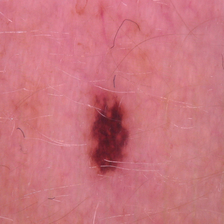

1275.jpg


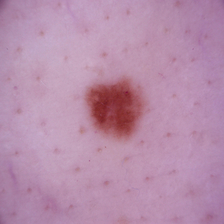

501.jpg


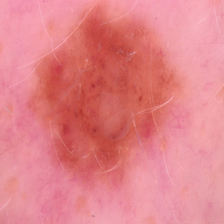

1048.jpg


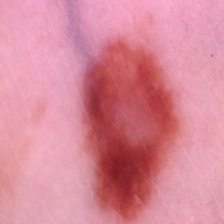

328.jpg


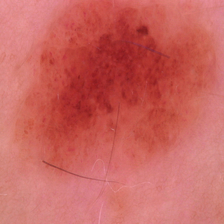

In [9]:
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(5):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [10]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
IMAGE_SIZE = [224, 224]

In [12]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 2s 0us/step


In [13]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [14]:
for layer in vgg.layers:
  layer.trainable = False

In [15]:
folders = glob('skincancerdataset/train/*')
print(len(folders))

2


In [16]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [18]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [19]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [20]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [21]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [28]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=5,
    validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
5/5 - 14s - loss: 1.5904 - accuracy: 0.8188 - val_loss: 1.9669 - val_accuracy: 0.8076

Epoch 00001: val_loss improved from inf to 1.96686, saving model to mymodel.h5
Epoch 2/10
5/5 - 14s - loss: 1.6278 - accuracy: 0.8313 - val_loss: 1.4810 - val_accuracy: 0.8212

Epoch 00002: val_loss improved from 1.96686 to 1.48099, saving model to mymodel.h5
Epoch 3/10
5/5 - 13s - loss: 1.3130 - accuracy: 0.8438 - val_loss: 1.6873 - val_accuracy: 0.8318

Epoch 00003: val_loss did not improve from 1.48099
Epoch 4/10
5/5 - 13s - loss: 1.6029 - accuracy: 0.8188 - val_loss: 1.6182 - val_accuracy: 0.8273

Epoch 00004: val_loss did not improve from 1.48099
Epoch 5/10
5/5 - 13s - loss: 1.3327 - accuracy: 0.8188 - val_loss: 1.8952 - val_accuracy: 0.7864

Epoch 00005: val_loss did not improve from 1.48099
Epoch 6/10
5/5 - 14s - loss: 1.6452 - accuracy: 0.8438 - val_loss: 2.4450 - val_accuracy: 0.7803

Epoch 00006: val_loss did not improve from 1.48099
Epoch 7/10
5/5 - 13s - loss: 1.7671 - accuracy

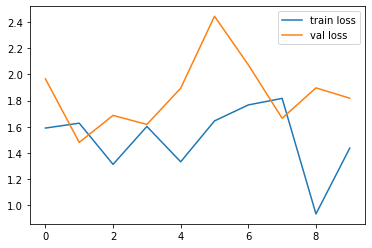

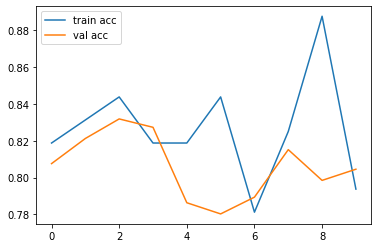

<Figure size 432x288 with 0 Axes>

In [29]:
# loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
import keras
import tensorflow as tf
def Classify_Image(target_img_path):
    img = keras.preprocessing.image.load_img(
    target_img_path, target_size=IMAGE_SIZE)
    
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    
    predictions = model.predict(img_array)
    result = [np.argmax(element) for element in predictions]
    print(result)
    
    if result == [0]:
        return "Benign"
    elif result == [1]:
        return "Malignant"
  
    else:
        return "We didnt find anything"

In [51]:
## Testing Some Outside World Images for Model
res = Classify_Image('1714-b.jpg')
print(res)

[0]
Benign


In [39]:
res = Classify_Image('139-m.jpg')
print(res)

[0]
Benign


In [40]:
res = Classify_Image('1538-b.jpg')
print(res)

[0]
Benign


In [41]:
res = Classify_Image('161-m.jpg')
print(res)

[0]
Benign


In [42]:
res = Classify_Image('1721-b.jpg')
print(res)

[1]
Malignant


In [44]:
res = Classify_Image('58-m.jpg')
print(res)

[1]
Malignant


In [45]:
res = Classify_Image('92-m.jpg')
print(res)

[1]
Malignant


In [46]:
res = Classify_Image('91-m.jpg')
print(res)

[1]
Malignant


In [47]:
res = Classify_Image('1758-b.jpg')
print(res)

[0]
Benign


In [ ]:
res = Classify_Image('1714-b.jpg')
print(res)

In [48]:
res = Classify_Image('193-m.jpg')
print(res)

[1]
Malignant


In [49]:
res = Classify_Image('1646-b.jpg')
print(res)

[0]
Benign


[0]
Benign


In [50]:
### We can add keras tuner to hypertune our model as well.